Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.5289 - val_loss: 0.4577
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.4249 - val_loss: 0.4057
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3946 - val_loss: 0.3866
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3767 - val_loss: 0.3705
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3625 - val_loss: 0.3583


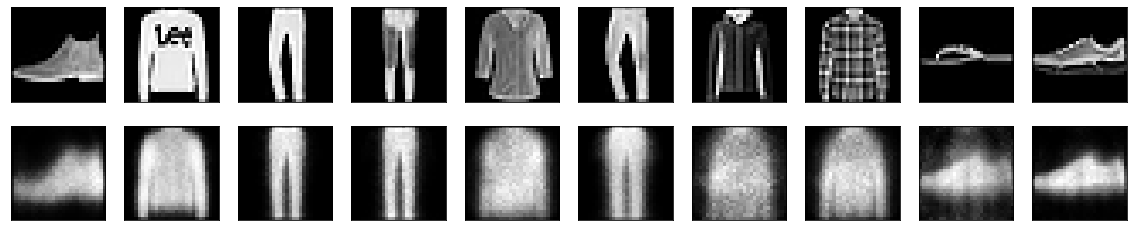

In [1]:
# -*- coding: utf-8 -*-
"""ML_ICP_que1&2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/18IFcrf-KiYv5Jy3TA2Xd4KRBT3juYG5l
"""

from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    


# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()